In [17]:
#Nguyễn Thị Tuyết Ngân - K214051252
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from scipy.interpolate import splrep, splev
import seaborn as sns

In [18]:
# Đọc dữ liệu từ các tệp Excel
VN2018 = pd.read_excel("2018-Vietnam.xlsx")
VN2019 = pd.read_excel("2019-Vietnam.xlsx")
VN2020 = pd.read_excel("2020-Vietnam.xlsx")
VN2021 = pd.read_excel("2021-Vietnam.xlsx")
VN2022 = pd.read_excel("2022-Vietnam.xlsx")
# Nối dữ liệu
inf = pd.concat([VN2018, VN2019, VN2020, VN2021, VN2022], ignore_index=True)

# Tiền xử lý dữ liệu
inf = inf.iloc[7:].reset_index(drop=True)
inf.columns = inf.iloc[0]
inf = inf[1:]
inf.reset_index(drop=True, inplace=True)
inf = pd.DataFrame(inf)
# Danh sách các cột không muốn thay đổi
excluded_columns = ["STT", "Mã", "Tên công ty", "Sàn", "Ngành ICB - cấp 1", "Ngành ICB - cấp 2", "Ngành ICB - cấp 3", "Ngành ICB - cấp 4"]

# Kiểm tra và loại bỏ khoảng trắng từ tên cột
inf.columns = inf.columns.where(inf.columns.isin(excluded_columns), inf.columns.str.extract(r'\s*([^\n]+)\n', expand=False))


DATA PROCESSING

In [19]:
import pandas as pd

# Giả sử bạn đã có DataFrame 'inf'.

# Tạo danh sách các tên cột bạn muốn lấy
columns_to_extract = [
    'Mã',
    'Năm',
    'CĐKT. NỢ PHẢI TRẢ',
    'CĐKT. TỔNG CỘNG TÀI SẢN',
    'CĐKT. TÀI SẢN NGẮN HẠN',
    'CĐKT. Nợ ngắn hạn',
    'CĐKT. TÀI SẢN DÀI HẠN',
    'LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT)',
    'KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp',
    'CĐKT. Tiền và tương đương tiền '
]

# Lấy các cột từ DataFrame
extracted_df = inf[columns_to_extract]

# Kiểm tra các giá trị N/A trong DataFrame
print("Số lượng giá trị N/A trong từng cột:")
print(extracted_df.isna().sum())

# Hiển thị số lượng hàng trước khi loại bỏ N/A
print("\nSố lượng hàng và cột trước khi loại bỏ N/A:", extracted_df.shape)

# Loại bỏ các hàng chứa giá trị N/A
extracted_df = extracted_df.dropna()

# Hiển thị số lượng hàng sau khi loại bỏ N/A
print("\nSố lượng hàng và cột sau khi loại bỏ N/A:", extracted_df.shape)

# Hiển thị DataFrame vừa lấy
extracted_df


Số lượng giá trị N/A trong từng cột:
0
Mã                                                                          75
Năm                                                                        693
CĐKT. NỢ PHẢI TRẢ                                                          694
CĐKT. TỔNG CỘNG TÀI SẢN                                                    694
CĐKT. TÀI SẢN NGẮN HẠN                                                     836
CĐKT. Nợ ngắn hạn                                                          839
CĐKT. TÀI SẢN DÀI HẠN                                                      839
LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT)    718
KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp                             698
CĐKT. Tiền và tương đương tiền                                             694
dtype: int64

Số lượng hàng và cột trước khi loại bỏ N/A: (8407, 10)

Số lượng hàng và cột sau khi loại bỏ N/A: (7538, 10)


,Mã,Năm,CĐKT. NỢ PHẢI TRẢ,CĐKT. TỔNG CỘNG TÀI SẢN,CĐKT. TÀI SẢN NGẮN HẠN,CĐKT. Nợ ngắn hạn,CĐKT. TÀI SẢN DÀI HẠN,LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT),KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp,CĐKT. Tiền và tương đương tiền
1,BCM,2018,31694260559889,45185042708904,30513454625559,22184209653041,14671588083345,659446948807,2311771208696,2577622049939
3,BVH,2018,97698783565332,113174755454063,69335209024327,25799328881234,43839546429736,7703073141458,1174508216165,2159930729474
5,FPT,2018,14982096384457,29757067149568,18406087226041,14451149990521,11350979923527,3588320092336,3233997141045,3925727206293
6,GAS,2018,15747295132679,62614420245293,40932012643396,11846614031313,21682407601897,12421887654437,11708565479976,6705645460007
7,GVR,2018,28030734972791,77373195939536,18429315133228,10337416492132,58943880806308,1068297434635,3333664427328,5159740351097
...,...,...,...,...,...,...,...,...,...,...
8391,XMD,2022,74457289789,115982829027,94947366694,74457289789,21035462333,-3866982814,3047662790,965555726
8392,XMP,2022,255408348024,423874411625,12449501444,35120342514,411424910181,42468915703,20622049792,594469127
8393,XPH,2022,3185566118,173414113599,59561333266,3085566118,113852780333,860927233,-6885887291,4408012328
8394,YBC,2022,702147200277,817158552732,361354335530,547053230275,455804217202,64257832269,7508474599,7963373873


In [20]:
# Kiểm tra dữ liệu trùng lặp
duplicated_rows = extracted_df.duplicated()
print("\nSố lượng hàng trùng lặp:", duplicated_rows.sum())

# Hiển thị các hàng trùng lặp (nếu có)
if duplicated_rows.any():
    print("\nCác hàng trùng lặp:")
    print(extracted_df[duplicated_rows])

# Loại bỏ các hàng trùng lặp
extracted_df = extracted_df.drop_duplicates()

# Hiển thị số lượng hàng sau khi loại bỏ các hàng trùng lặp
print("\nSố lượng hàng và cột sau khi loại bỏ các hàng trùng lặp:", extracted_df.shape)

# Hiển thị DataFrame cuối cùng sau khi làm sạch
extracted_df


Số lượng hàng trùng lặp: 0

Số lượng hàng và cột sau khi loại bỏ các hàng trùng lặp: (7538, 10)


,Mã,Năm,CĐKT. NỢ PHẢI TRẢ,CĐKT. TỔNG CỘNG TÀI SẢN,CĐKT. TÀI SẢN NGẮN HẠN,CĐKT. Nợ ngắn hạn,CĐKT. TÀI SẢN DÀI HẠN,LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT),KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp,CĐKT. Tiền và tương đương tiền
1,BCM,2018,31694260559889,45185042708904,30513454625559,22184209653041,14671588083345,659446948807,2311771208696,2577622049939
3,BVH,2018,97698783565332,113174755454063,69335209024327,25799328881234,43839546429736,7703073141458,1174508216165,2159930729474
5,FPT,2018,14982096384457,29757067149568,18406087226041,14451149990521,11350979923527,3588320092336,3233997141045,3925727206293
6,GAS,2018,15747295132679,62614420245293,40932012643396,11846614031313,21682407601897,12421887654437,11708565479976,6705645460007
7,GVR,2018,28030734972791,77373195939536,18429315133228,10337416492132,58943880806308,1068297434635,3333664427328,5159740351097
...,...,...,...,...,...,...,...,...,...,...
8391,XMD,2022,74457289789,115982829027,94947366694,74457289789,21035462333,-3866982814,3047662790,965555726
8392,XMP,2022,255408348024,423874411625,12449501444,35120342514,411424910181,42468915703,20622049792,594469127
8393,XPH,2022,3185566118,173414113599,59561333266,3085566118,113852780333,860927233,-6885887291,4408012328
8394,YBC,2022,702147200277,817158552732,361354335530,547053230275,455804217202,64257832269,7508474599,7963373873


In [21]:
from scipy import stats
import numpy as np
import pandas as pd

# Đảm bảo rằng các cột chứa dữ liệu số được chuyển đổi thành dạng số
numeric_columns = [
    'CĐKT. NỢ PHẢI TRẢ',
    'CĐKT. TỔNG CỘNG TÀI SẢN',
    'CĐKT. TÀI SẢN NGẮN HẠN',
    'CĐKT. Nợ ngắn hạn',
    'CĐKT. TÀI SẢN DÀI HẠN',
    'LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT)',
    'KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp',
    'CĐKT. Tiền và tương đương tiền ',
]

# Chuyển đổi các cột dữ liệu số thành dạng số và loại bỏ outlier
for col in numeric_columns:
    extracted_df[col] = pd.to_numeric(extracted_df[col], errors='coerce')

print("Number of rows before filtering outliers:", len(extracted_df))

# Loại bỏ outlier sử dụng Z-score
filtered_entries = np.array([True] * len(extracted_df))

for col in numeric_columns:
    # Tính Z-score cho cột hiện tại và loại bỏ giá trị NaN
    zscores = np.abs(stats.zscore(extracted_df[col], nan_policy='omit'))
    filtered_entries &= (zscores < 3)

# Sử dụng filtered_entries để lọc DataFrame
extracted_df = extracted_df[filtered_entries]

print("Number of rows after filtering outliers:", len(extracted_df))


Number of rows before filtering outliers: 7538
Number of rows after filtering outliers: 7372


In [22]:
import pandas as pd
import numpy as np

# Giả sử extracted_df đã được tải vào DataFrame
# Dưới đây là các công thức tính toán

# Tính Net asset
extracted_df['Net assets'] = extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN'] - extracted_df['CĐKT. NỢ PHẢI TRẢ']

# Tính CASH
extracted_df['CASH'] = extracted_df['CĐKT. Tiền và tương đương tiền '] / extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN']

# Tính Size
extracted_df['Size'] = np.log(extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN'])

# Tính LIQ
extracted_df['LIQ'] = extracted_df['CĐKT. TÀI SẢN NGẮN HẠN'] / extracted_df['CĐKT. Nợ ngắn hạn']

# Tính NWC
extracted_df['NWC'] = (extracted_df['CĐKT. TÀI SẢN NGẮN HẠN'] - extracted_df['CĐKT. Nợ ngắn hạn']) / extracted_df['Net assets']

# Tính CF
extracted_df['CF'] = extracted_df['LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT)'] / extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN']

# Tính LEV
extracted_df['LEV'] = extracted_df['CĐKT. NỢ PHẢI TRẢ'] / extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN']

# Tính ROA
extracted_df['ROA'] = extracted_df['KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp'] / extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN']


extracted_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15728\162708607.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['Net assets'] = extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN'] - extracted_df['CĐKT. NỢ PHẢI TRẢ']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15728\162708607.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['CASH'] = extracted_df['CĐKT. Tiền và tương đương tiền '] / extracted_df['CĐKT. TỔNG CỘNG TÀI SẢN']
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15728\162708607.py:14:

,Mã,Năm,CĐKT. NỢ PHẢI TRẢ,CĐKT. TỔNG CỘNG TÀI SẢN,CĐKT. TÀI SẢN NGẮN HẠN,CĐKT. Nợ ngắn hạn,CĐKT. TÀI SẢN DÀI HẠN,LCTT. Lưu chuyển tiền tệ ròng từ các hoạt động sản xuất kinh doanh (TT),KQKD. Lợi nhuận sau thuế thu nhập doanh nghiệp,CĐKT. Tiền và tương đương tiền,Net assets,CASH,Size,LIQ,NWC,CF,LEV,ROA
18,SSI,2018,1.466996e+13,2.382563e+13,2.227036e+13,1.346941e+13,1.555270e+12,-2.938170e+12,1.302937e+12,6.128801e+11,9.155665e+12,0.025724,30.801783,1.653403,0.961257,-0.123320,0.615722,0.054686
30,AAA,2018,4.548917e+12,7.529167e+12,3.989369e+12,3.206103e+12,3.539797e+12,3.854078e+10,2.121489e+11,6.454748e+11,2.980250e+12,0.085730,29.649805,1.244305,0.262819,0.005119,0.604173,0.028177
31,AAM,2018,1.827998e+10,2.299590e+11,1.853320e+11,1.524498e+10,4.462708e+10,1.677575e+10,9.591231e+09,1.109879e+10,2.116791e+11,0.048264,26.161167,12.156916,0.803513,0.072951,0.079492,0.041708
32,AAT,2018,2.034971e+11,5.932450e+11,1.288567e+11,8.393537e+10,4.643884e+11,7.072310e+10,2.398996e+10,6.716559e+09,3.897480e+11,0.011322,27.108873,1.535189,0.115257,0.119214,0.343024,0.040439
33,ABR,2018,2.676295e+09,3.598967e+10,2.312479e+10,2.676295e+09,1.286489e+10,2.306844e+09,1.726639e+09,1.087742e+09,3.331338e+10,0.030224,24.306498,8.640599,0.613822,0.064097,0.074363,0.047976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,XMD,2022,7.445729e+10,1.159828e+11,9.494737e+10,7.445729e+10,2.103546e+10,-3.866983e+09,3.047663e+09,9.655557e+08,4.152554e+10,0.008325,25.476708,1.275192,0.493433,-0.033341,0.641968,0.026277
8392,XMP,2022,2.554083e+11,4.238744e+11,1.244950e+10,3.512034e+10,4.114249e+11,4.246892e+10,2.062205e+10,5.944691e+08,1.684661e+11,0.001402,26.772703,0.354481,-0.134572,0.100192,0.602557,0.048651
8393,XPH,2022,3.185566e+09,1.734141e+11,5.956133e+10,3.085566e+09,1.138528e+11,8.609272e+08,-6.885887e+09,4.408012e+09,1.702285e+11,0.025419,25.878948,19.303211,0.331764,0.004965,0.018370,-0.039708
8394,YBC,2022,7.021472e+11,8.171586e+11,3.613543e+11,5.470532e+11,4.558042e+11,6.425783e+10,7.508475e+09,7.963374e+09,1.150114e+11,0.009745,27.429099,0.660547,-1.614614,0.078636,0.859255,0.009189


DATA DESCRIPTION

In [32]:
# Chọn các biến quan tâm
variables = ['CASH', 'Size', 'NWC', 'CF', 'LEV', 'ROA', 'LIQ']
model_data = extracted_df[variables]

extracted_df[variables].describe()

,CASH,Size,NWC,CF,LEV,ROA,LIQ
count,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000,7372.000000
mean,0.079404,27.027362,0.286986,0.043104,0.621683,0.027448,3.136261
std,0.095179,1.549533,7.420806,0.216021,1.827435,0.379944,10.091209
min,0.000006,16.721515,-402.307307,-9.725643,0.000622,-21.143065,0.001221
25%,0.017054,25.943386,0.127315,-0.019774,0.288987,0.006973,1.069027
50%,0.047095,26.969213,0.415752,0.040902,0.494351,0.033605,1.430754
75%,0.105818,28.047989,0.696140,0.120792,0.682789,0.074629,2.470095
max,0.855117,31.442048,249.971420,2.453826,79.280450,2.873531,408.731402


DATA VISUALIZATION

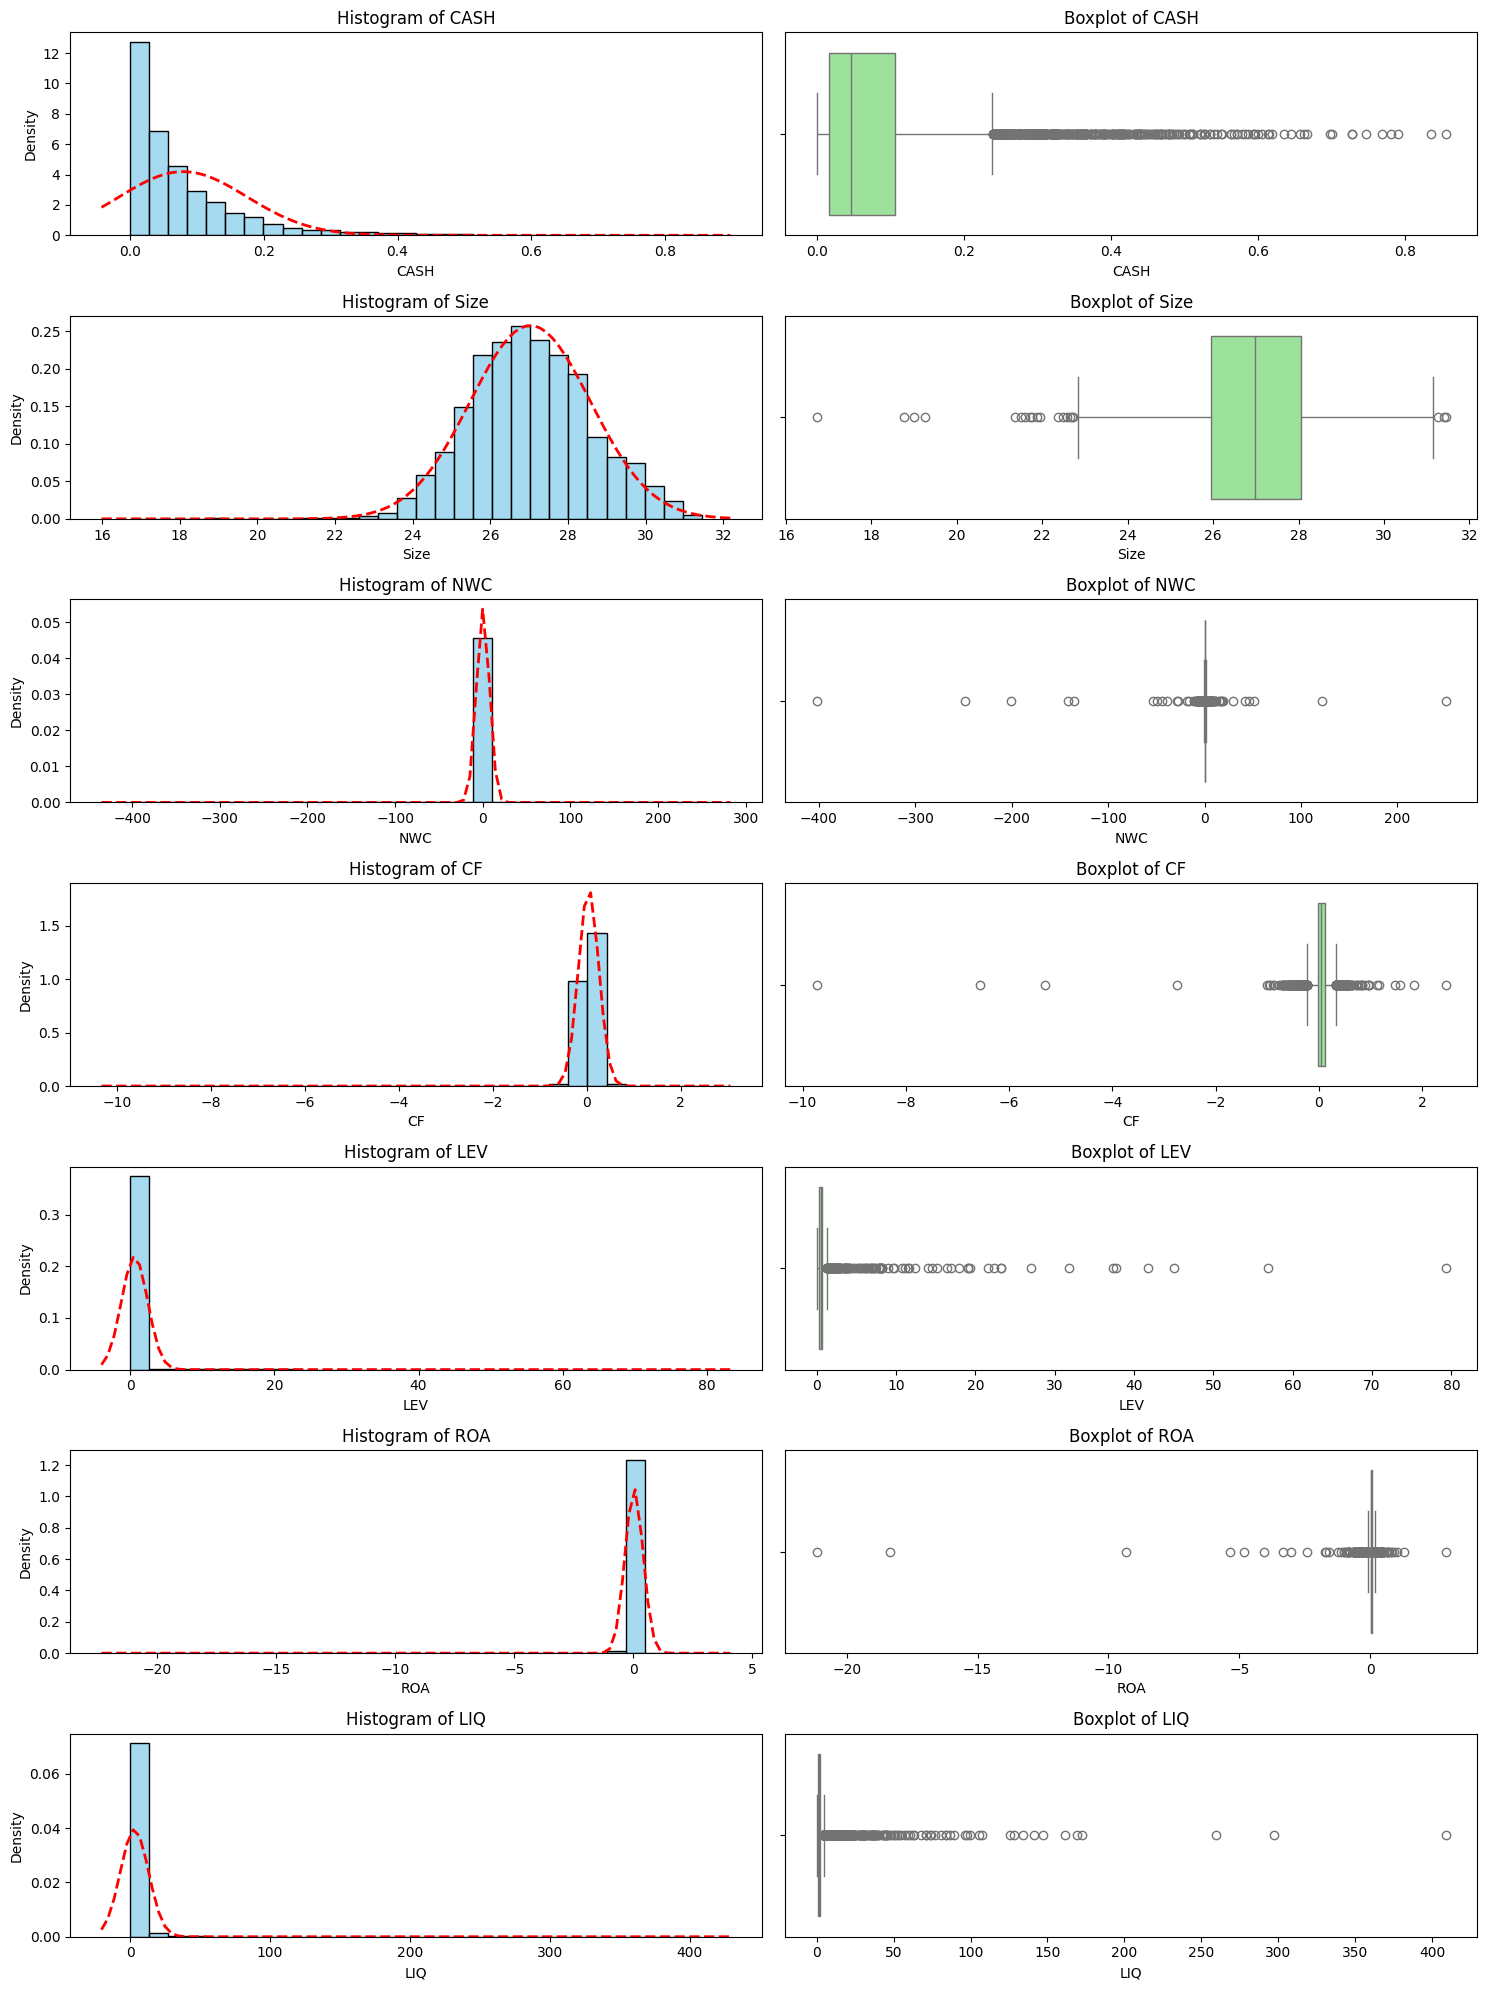

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Giả sử extracted_df là DataFrame chứa các biến cần vẽ histogram và boxplot
variables = ['CASH', 'Size', 'NWC', 'CF', 'LEV', 'ROA', 'LIQ']

# Thiết lập kích thước cho đồ thị
plt.figure(figsize=(15, 20))

# Duyệt qua từng biến và vẽ histogram kèm đường cong biểu diễn độ lệch và boxplot
for i, var in enumerate(variables):
    # Vẽ histogram
    plt.subplot(7, 2, 2 * i + 1)
    sns.histplot(extracted_df[var], kde=False, color='skyblue', stat='density', bins=30)
    mu, std = norm.fit(extracted_df[var])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r--', linewidth=2)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    
    # Vẽ boxplot
    plt.subplot(7, 2, 2 * i + 2)
    sns.boxplot(x=extracted_df[var], color='lightgreen')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


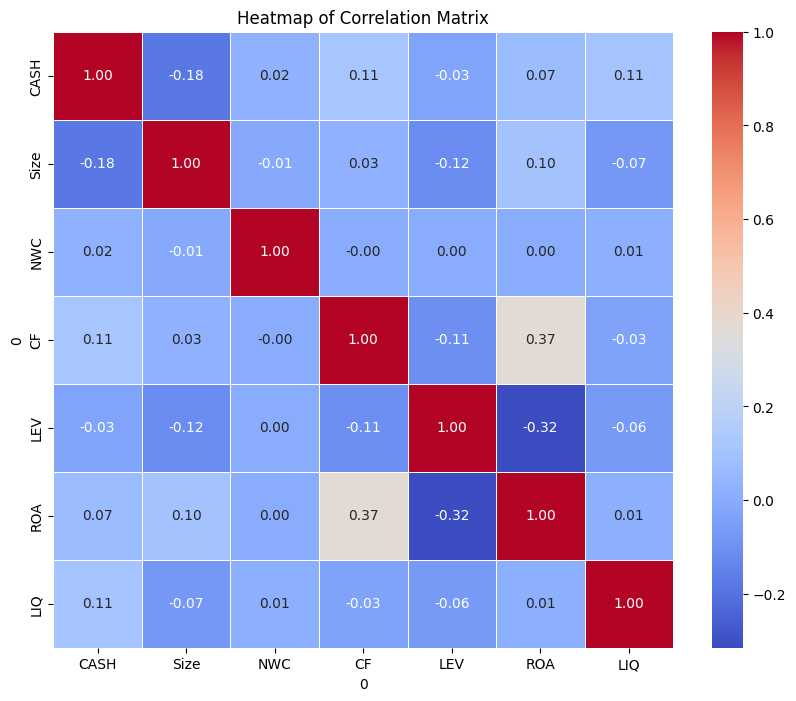

In [31]:
# Chọn các biến quan tâm
variables = ['CASH', 'Size', 'NWC', 'CF', 'LEV', 'ROA', 'LIQ']
model_data = extracted_df[variables]

# Tính ma trận tương quan
corr_matrix = model_data.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

MACHINE LEARNING

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  # Import SVM
from sklearn.neural_network import MLPRegressor  # Import Neural Network Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor  # Import XGBoost Regressor

# Assume extracted_df has been loaded into a DataFrame and required variables have been computed

# Create DataFrame containing only necessary columns for modeling
model_data = extracted_df[['Size', 'NWC', 'CF', 'LEV', 'ROA', 'CASH', 'LIQ']]

# Separate independent variables (X) and dependent variable (y)
X = model_data[['Size', 'NWC', 'CF', 'LEV', 'ROA', 'LIQ']]
y = model_data['CASH']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize a list to store results
results = []

# Initialize models (add SVM with kernel and XGBoost)
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network': MLPRegressor(random_state=42),  # Initialize Neural Network Regressor
    'XGBoost': XGBRegressor(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Append results to the list
    results.append({
        'Model': name,
        'R-squared (R2)': r2,
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'Root Mean Squared Error (RMSE)': rmse
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,Model,R-squared (R2),Mean Squared Error (MSE),Mean Absolute Error (MAE),Root Mean Squared Error (RMSE)
0,Random Forest,0.190086,0.007426,0.057161,0.086177
1,Gradient Boosting,0.195125,0.007380,0.057191,0.085908
2,Neural Network,0.151997,0.007776,0.059367,0.088180
3,XGBoost,0.103185,0.008223,0.059160,0.090682
